In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df_copy = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
#This removes the duplicated rows
df.drop_duplicates(inplace=True)
df.loc[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species


<Axes: >

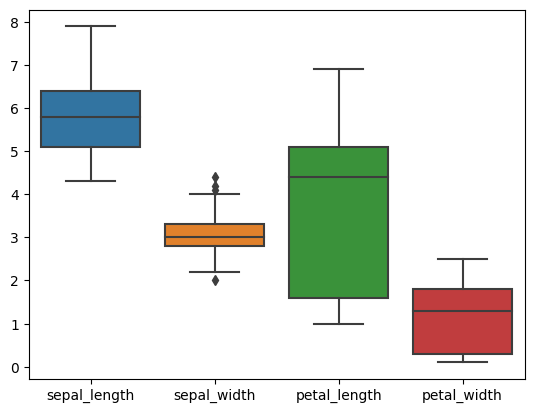

In [5]:
#This shows that sepal width has some outliers in it
sns.boxplot(df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


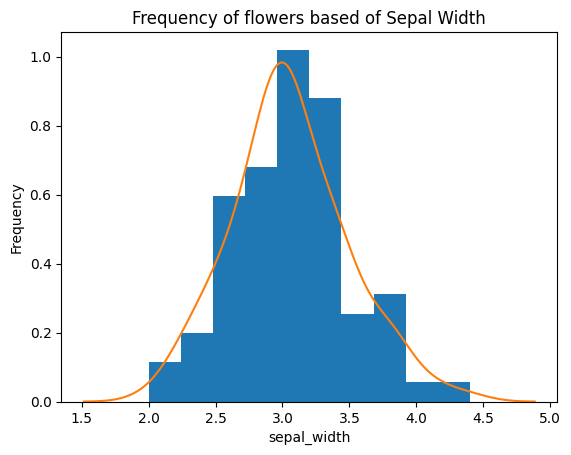

In [6]:
df['sepal_width'].plot(kind='hist',density=True)
sns.kdeplot(df['sepal_width'])
plt.title('Frequency of flowers based of Sepal Width')
plt.show()

<Axes: >

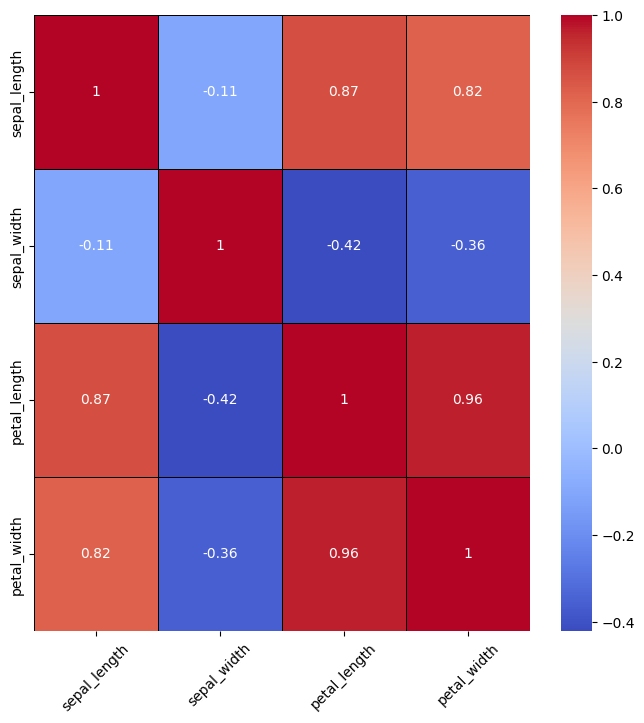

In [7]:
corr_columns = df[['sepal_length','sepal_width','petal_length','petal_width']]
corr_columns = corr_columns.corr()
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.heatmap(corr_columns,linewidth=0.7,linecolor='black',cmap='coolwarm',annot=True)

<Axes: xlabel='species', ylabel='petal_length'>

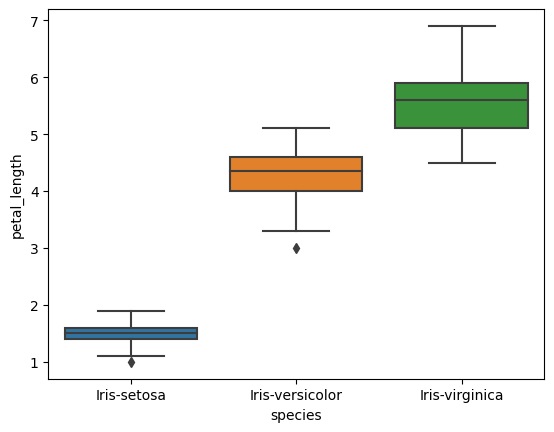

In [8]:
sns.boxplot(x='species', y='petal_length', data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

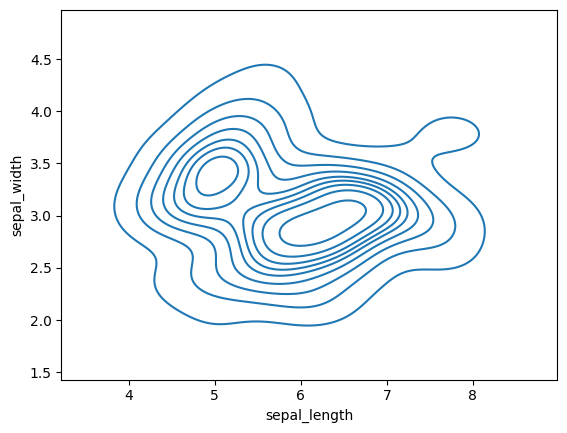

In [9]:
sns.kdeplot(x='sepal_length', y='sepal_width',data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

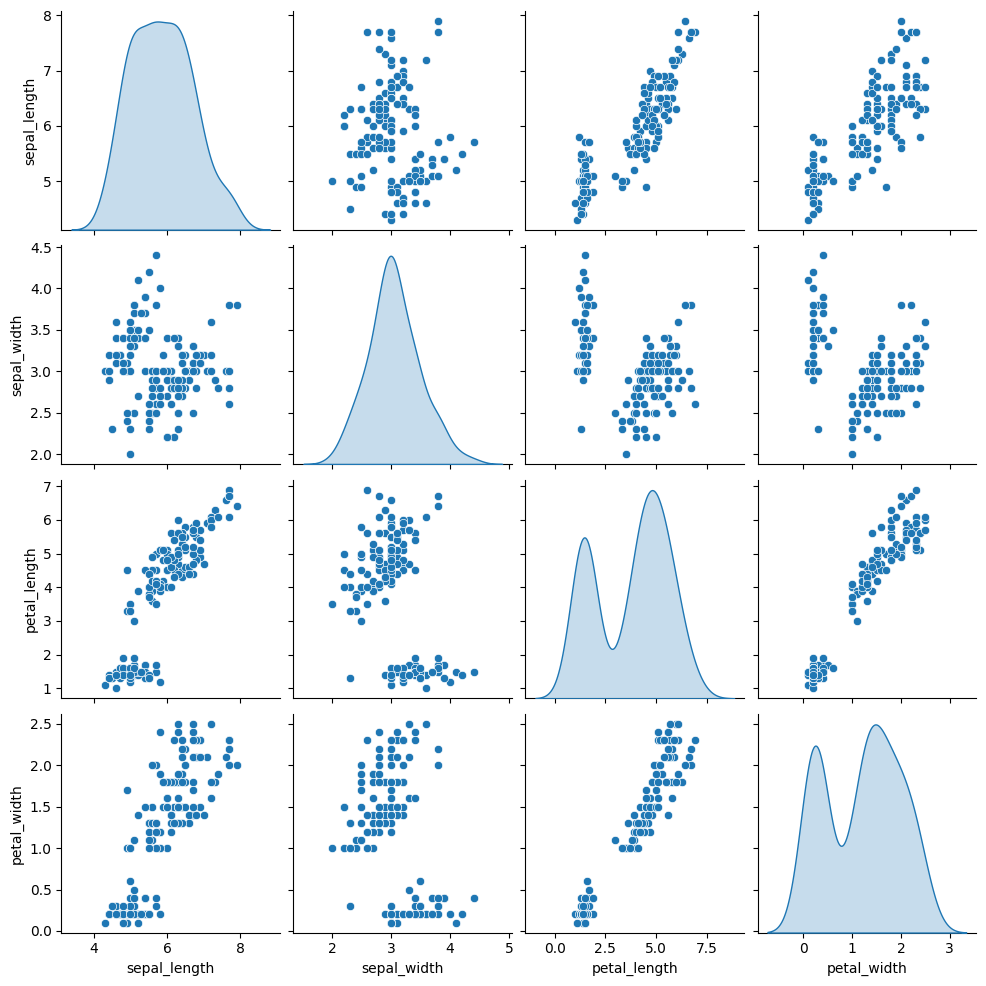

In [10]:
sns.pairplot(df,diag_kind='kde')

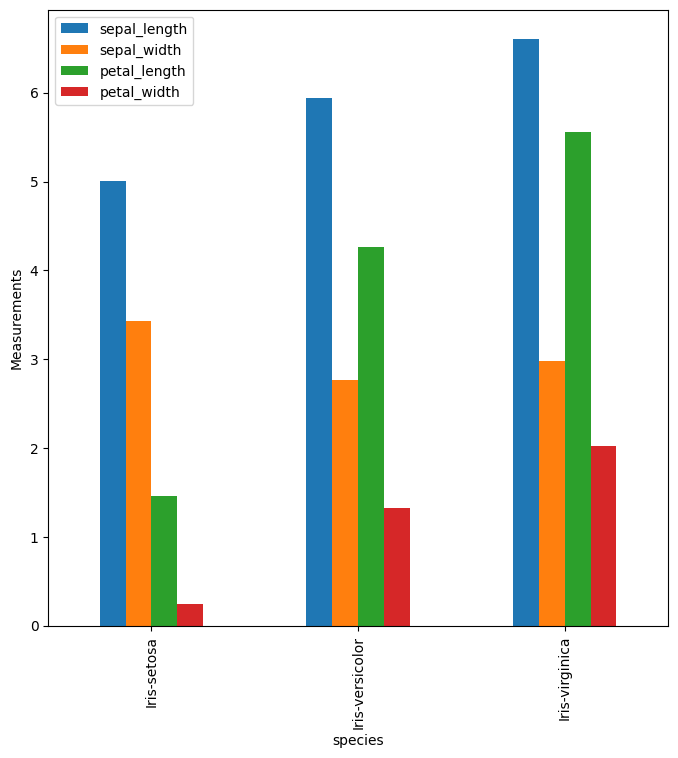

In [11]:
imp = ['sepal_length','sepal_width','petal_length','petal_width']
df.groupby('species')[imp].mean().plot(kind='bar',figsize=(8,8),legend=True)
plt.ylabel('Measurements')
plt.show()

<Axes: ylabel='Measurements'>

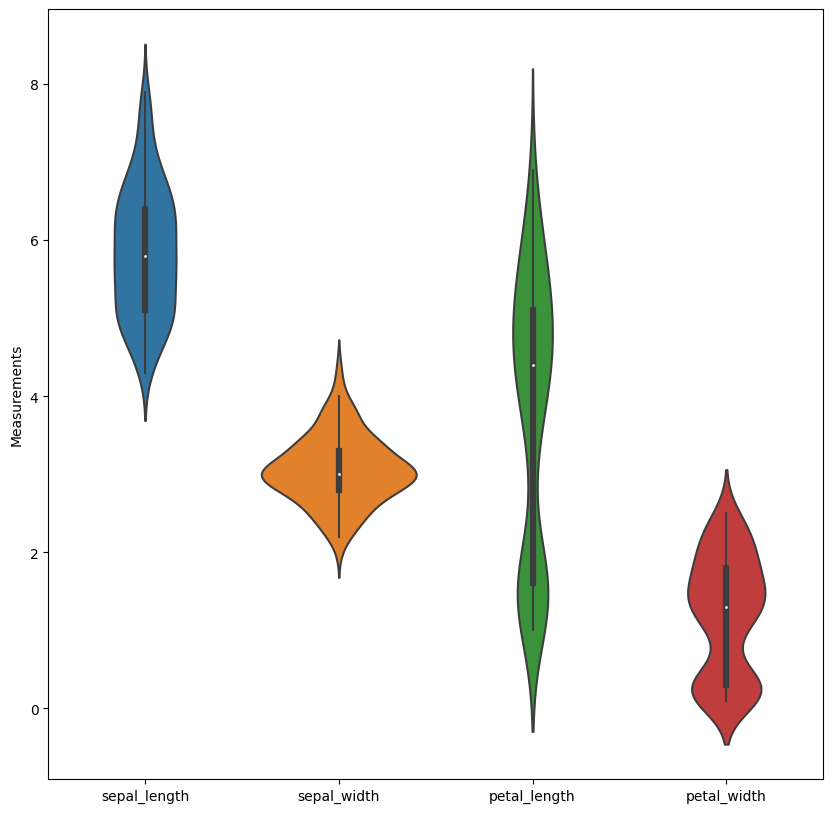

In [12]:
plt.figure(figsize=(10,10))
plt.ylabel('Measurements')
sns.violinplot(df,legend=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 800x800 with 0 Axes>

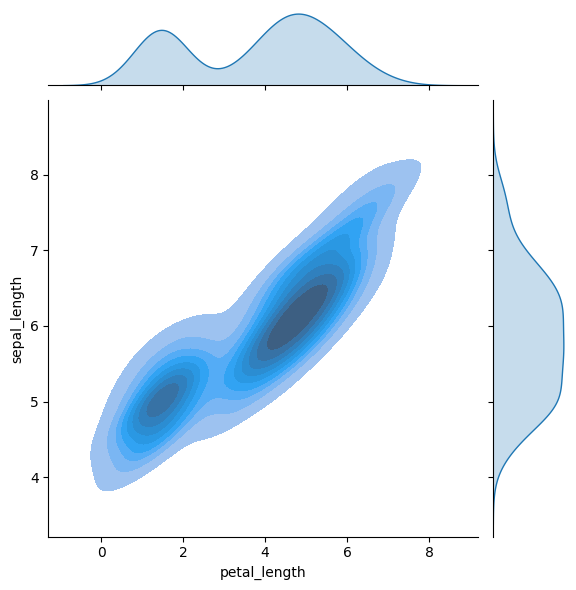

In [13]:
plt.figure(figsize=(8,8))
sns.jointplot(x='petal_length',y='sepal_length',data=df,kind='kde',fill=True)